In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array([ [1, 0, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1] ])

In [12]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 8
        outLayerNeurons = 4

        self.learning_rate = 0.2
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H1H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH2 = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI1)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_H1H2)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        output_input = np.dot(self.hidden_output2, self.W_OH2)
        pred = self.sigmoid(output_input)

        rounded_pred = np.copy(pred)
        rounded_pred[rounded_pred > 0.95] = 1
        rounded_pred[rounded_pred < 0.05] = 0
        return rounded_pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error2 = output_delta.dot(self.W_OH2.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H1H2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)


        self.W_HI1 += X.T.dot(hidden_delta1)
        self.W_H1H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_OH2 += self.hidden_output2.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

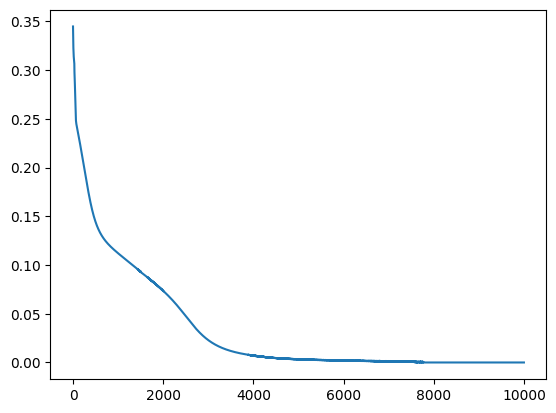

In [13]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [14]:
print(NN.feedForward([0,0]))

[1. 0. 1. 0.]


In [15]:
print(NN.feedForward([1,1]))

[1. 0. 0. 1.]


In [16]:
print(NN.feedForward([1,0]))

[0. 1. 0. 1.]


In [17]:
print(NN.feedForward([0,1]))

[0. 1. 1. 0.]
